In [1]:
# Check if running on colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# pip install any missing packages
if IN_COLAB:
  !pip install equadratures # for standard pip install

import numpy as np                                                                                                                                                                                      
import equadratures as eq

# Foundations I: Parameter

A **parameter** is one of the main building blocks in Effective Quadratures. Let $s$ be a parameter defined on a domain $\mathcal{D} \in \mathbb{R}$. The support of the domain $\mathcal{D}$ may be:

* closed $[a,b]$
* semi-infinite $(-\infty, b)$ or $[a, \infty)$
* infinite $(-\infty, \infty)$

Further, let us assume that this parameter is characterized by a positive weight function $\rho(s)$, which may be interpreted as the probability density function (PDF) of $s$, which readily implies that

$$
	\int_{\mathcal{D}}\rho\left(s\right)ds=1.
$$

We now demonstrate some basic functionality of this parameter. First consider the case where $\rho(s) = \mathcal{N} (0, 1)$ is a standard Gaussian distribution with a mean of 0.0 and a variance of 1.0. We then plot its PDF and cumulative density function (CDF) and demonstrate how we can generate random samples from this distribution.

In [2]:
s = eq.Parameter(distribution='normal', shape_parameter_A = 0.0, \
                 shape_parameter_B = 1.0, order=3)

Now for some plots; first let us plot the PDF. We can call `s.get_pdf()` to get a numpy array containing the pdf values, but instead, lets use `plot_pdf()` here.

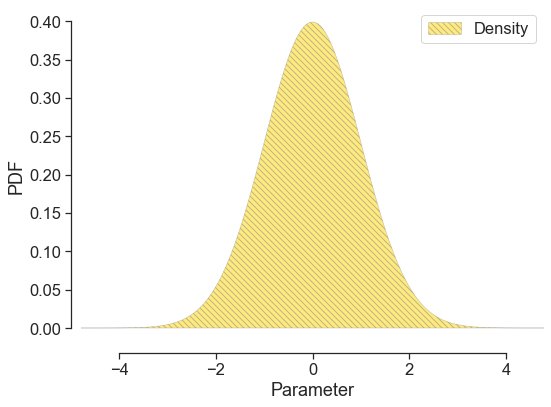

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='Parameter', ylabel='PDF'>)

In [3]:
s.plot_pdf()

and similarly, lets plot the CDF.

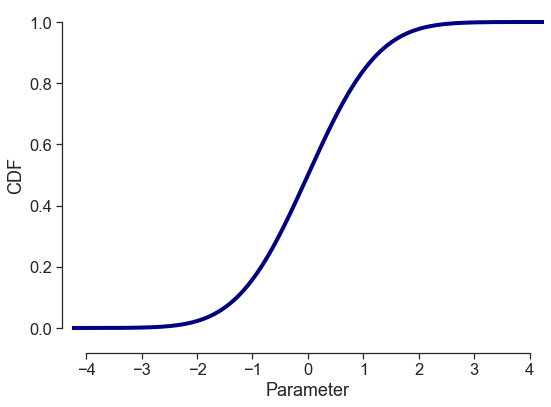

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='Parameter', ylabel='CDF'>)

In [4]:
s.plot_cdf()

Now, lets use the `get_samples()` functionality to sample from the parameter distribution. These samples can be passed to `plot_pdf` to create a histogram.

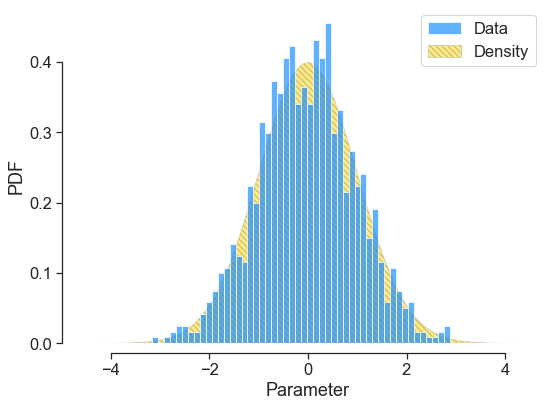

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='Parameter', ylabel='PDF'>)

In [5]:
s_samples = s.get_samples(1000)
s.plot_pdf(data=s_samples)

One can repeat the above for a range of distributions. We provide a few additional definitions below. First, consider the example of a Gaussian distribution $\mathcal{N}(0,1)$, truncanted between $[-1,2]$.

In [6]:
s = eq.Parameter(distribution='truncated-gaussian', lower=-1.0, upper=2., \
                 shape_parameter_A = 0.0, shape_parameter_B = 1.0, order=3)

followed by that of a custom distribution—based on user supplied data.

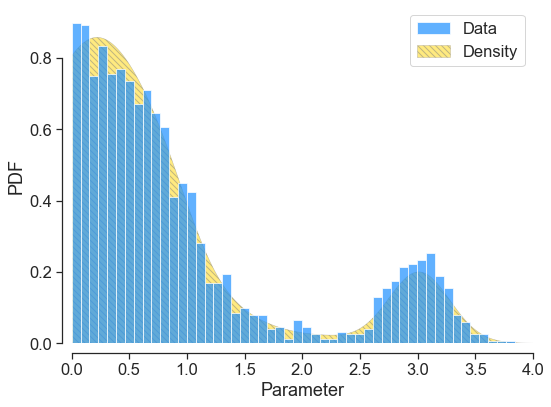

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='Parameter', ylabel='PDF'>)

In [7]:
# Create some data
param1 = np.random.rand(500)
param2 = np.random.randn(600)
param3 = np.random.randn(650)*0.5 - 0.2
param4 = np.random.randn(150)*0.1 + 3
data = np.hstack([param1, param2, param3, param4])

# Fit a Weight function to this data
input_dist = eq.Weight(data, support=[0, 4], pdf=False)

# Use the weight function to define a bespoke data-driven Parameter.
# We can also can truncate the data to a tighter support.
s = eq.Parameter(distribution='data', weight_function=input_dist, order=3)

# Plot the cdf
s.plot_pdf(data=s.get_samples(2000))